In [1]:
#Download neccessary dependencies to start analysis.
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
!conda install -c anaconda seaborn -y
import seaborn as sns

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be UPDATED:

    seaborn: 0.8.0-py35h15a2772_0 --> 0.9.0-py35_0 anaconda

seaborn-0.9.0- 100% |################################| Time: 0:00:00  51.50 MB/s


In [5]:
# The code was removed by Watson Studio for sharing.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#replace Yes and No to 1 and 0
for columns in df_data_1:
    dummies = df_data_1.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)

df_data_1.gender.replace(to_replace=['Female', 'Male'], value=[0, 1],inplace=True)
df_data_1.InternetService.replace(to_replace=['DSL', 'Fiber optic'], value=[1, 2],inplace=True)

In [7]:
df_data_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,1,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,1,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,1,2,0,...,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1
6,1452-KIOVK,1,0,0,1,22,1,1,2,0,...,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,0,0,0,0,10,0,No phone service,1,1,...,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0
8,7892-POOKP,0,0,1,0,28,1,1,2,0,...,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,1,1,...,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [27]:
df_data_1.replace(to_replace='No phone service', value=np.NaN, inplace=True)
df_data_1.replace(to_replace='No internet service', value=np.NaN, inplace=True)
df_data_1.dropna(axis=0, inplace=True)
df_data_1.reset_index(drop = True, inplace = True)
df_data_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5575-GNVDE,1,0,0,0,34,1,0.0,1,1.0,...,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.5,0
1,3668-QPYBK,1,0,0,0,2,1,0.0,1,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
2,9237-HQITU,0,0,0,0,2,1,0.0,2,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1
3,9305-CDSKC,0,0,0,0,8,1,1.0,2,0.0,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,99.65,820.5,1
4,1452-KIOVK,1,0,0,1,22,1,1.0,2,0.0,...,0.0,0.0,1.0,0.0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0


In [14]:
df_data_1['Churn'].value_counts()

0    3249
1    1586
Name: Churn, dtype: int64

1586 customers churned while 3249 customers have not churned.

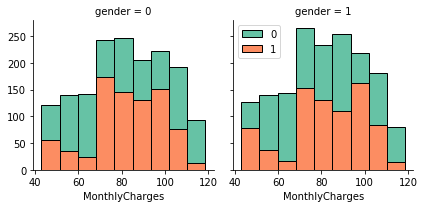

In [29]:
#Plot based on gender and monthly charges
bins = np.linspace(df_data_1.MonthlyCharges.min(), df_data_1.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df_data_1, col="gender", hue="Churn", palette="Set2", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges',bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

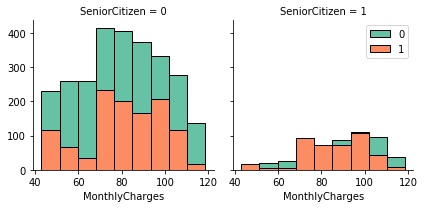

In [33]:
#Plot churn based on if customers are senior citizens or not
bins = np.linspace(df_data_1.MonthlyCharges.min(), df_data_1.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df_data_1, col="SeniorCitizen", hue="Churn", palette="Set2", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

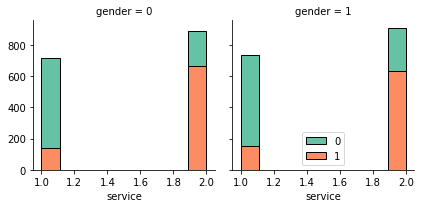

In [38]:
#Plot churn based on what internet service they have
df_data_1['service'] = df_data_1['InternetService']
bins = np.linspace(df_data_1.service.min(), df_data_1.service.max(), 10)
g = sns.FacetGrid(df_data_1, col="gender", hue="Churn", palette="Set2", col_wrap=2)
g.map(plt.hist, 'service', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [39]:
df_data_1.groupby(['gender'])['Churn'].value_counts(normalize=True)

gender  Churn
0       0        0.666805
        1        0.333195
1       0        0.677113
        1        0.322887
Name: Churn, dtype: float64

33.32% females churned while 32.29% males churned

In [41]:
df_data_1.groupby(['InternetService','MultipleLines'])['Churn'].value_counts(normalize=True)

InternetService  MultipleLines  Churn
1                0.0            0        0.793893
                                1        0.206107
                 1.0            0        0.894356
                                1        0.105644
2                0.0            0        0.542314
                                1        0.457686
                 1.0            0        0.604231
                                1        0.395769
Name: Churn, dtype: float64

20.6% customers with 1 line and DSL service churned.

10.56% customers with multiple lines and DSL service churned.

45.77% customers with 1 line and fiber optic service churned.

39.58% customers with multiple lines and fiber optic service churned.